# An Overcrowded Gym

### **Introduction**

If you’ve ever worked out at a public gym, you’ve probably experienced the frustration of it being overcrowded at least once. Waiting in line for machines or simply trying to find some personal space can be inconvenient and disrupt the workout routine you had planned.

In this guided project, we will demonstrate how machine learning can help predict the best time to go to the gym. Specifically, we’ll train and build a **stochastic gradient descent linear regression model** to forecast how many people will be at the gym at a given day and time.

For this hypothetical scenario, we’ll use a dataset provided by **DataQuest** that contains historical information about how busy a campus gym has been. The dataset includes details such as the date, time, and other characteristics of each day.

Let’s get started by setting up our project. Our first step is to import the necessary libraries.

### **Set Up**

In [1]:
# general libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

With our libraries imported, we’re ready to bring in our dataset.

In [2]:
gym = pd.read_csv('crowded_gym_data.csv')

### **EDA – Exploratory Data Analysis**

With the data loaded, the next step is to explore it. The goal here is to understand the dataset, make initial observations, and identify any potential issues that might require cleaning or correction.

In [3]:
gym

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


**`gym` – Observations:**

* 62,184 rows and 11 columns
* `date` and `timestamp` columns contain similar information in different formats
* `day_of_week`, `month`, and `hour` provide specific time-based details
* `is_weekend`, `is_holiday`, `is_start_of_semester`, and `is_during_semester` describe contextual aspects of the day
* The `temperature` column is interesting, and we’ll investigate how it correlates with gym attendance later

In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


**`gym.info()` – Observations:**

* No null values
* The only non-numeric column is `date`
* `temperature` is the only column stored as a float

In [5]:
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


**`gym.describe()` – Observations:**

* The `is_weekend`, `is_holiday`, `is_start_of_semester`, and `is_during_semester` columns are binary (values 0 or 1)
* The `date` column isn’t shown because it’s not numeric
* Maximum recorded gym attendance is 145
* Everything appears consistent with no obvious anomalies

**Dataset Column Definitions (from Dataquest):**

* **`number_people`** – Number of people in the gym during each observation (target variable).
* **`date`** – String with the exact date and time.
* **`timestamp`** – Integer representing the number of seconds since 00:00.
* **`day_of_week`** – Integer where 0 = Monday and 6 = Sunday.
* **`is_weekend`** – Binary (1 = weekend, 0 = weekday).
* **`is_holiday`** – Binary (1 = holiday, 0 = not a holiday).
* **`temperature`** – Float for the day’s temperature in °F.
* **`is_start_of_semester`** – Binary (1 = first 2 weeks of semester, 0 = otherwise).
* **`is_during_semester`** – Binary (1 = during semester, 0 = outside semester).
* **`month`** – Integer (1 = January, 12 = December).
* **`hour`** – Integer representing the hour of the day (0–23).

### **Further Investigations and Cleaning**

Now that we understand the dataset, we’ll take a closer look at individual features. We want to understand how the columns relate to each other, their distributions, and what they represent.

The first change we’ll make is removing the `date` column. Since its information is already represented by `timestamp`, `day_of_week`, `is_weekend`, `month`, and `hour`, it’s redundant. Removing it will help declutter our dataframe.

In [6]:
gym = gym.drop('date', axis=1)
gym

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,0,61.07,0,1,3,18
62180,21,67955,5,1,0,61.07,0,1,3,18
62181,25,68560,5,1,0,56.71,0,1,3,19
62182,18,69167,5,1,0,56.71,0,1,3,19


Next, we’ll rename the `number_people` column to **`attendance`** for convenience.

In [7]:
gym.rename(columns={'number_people': 'attendance'}, inplace=True)
gym

,attendance,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,0,61.07,0,1,3,18
62180,21,67955,5,1,0,61.07,0,1,3,18
62181,25,68560,5,1,0,56.71,0,1,3,19
62182,18,69167,5,1,0,56.71,0,1,3,19


With the dataset refined, we’ll visualize the distributions of all columns. This will help us better understand our data and decide how to handle each feature in the modeling stage.

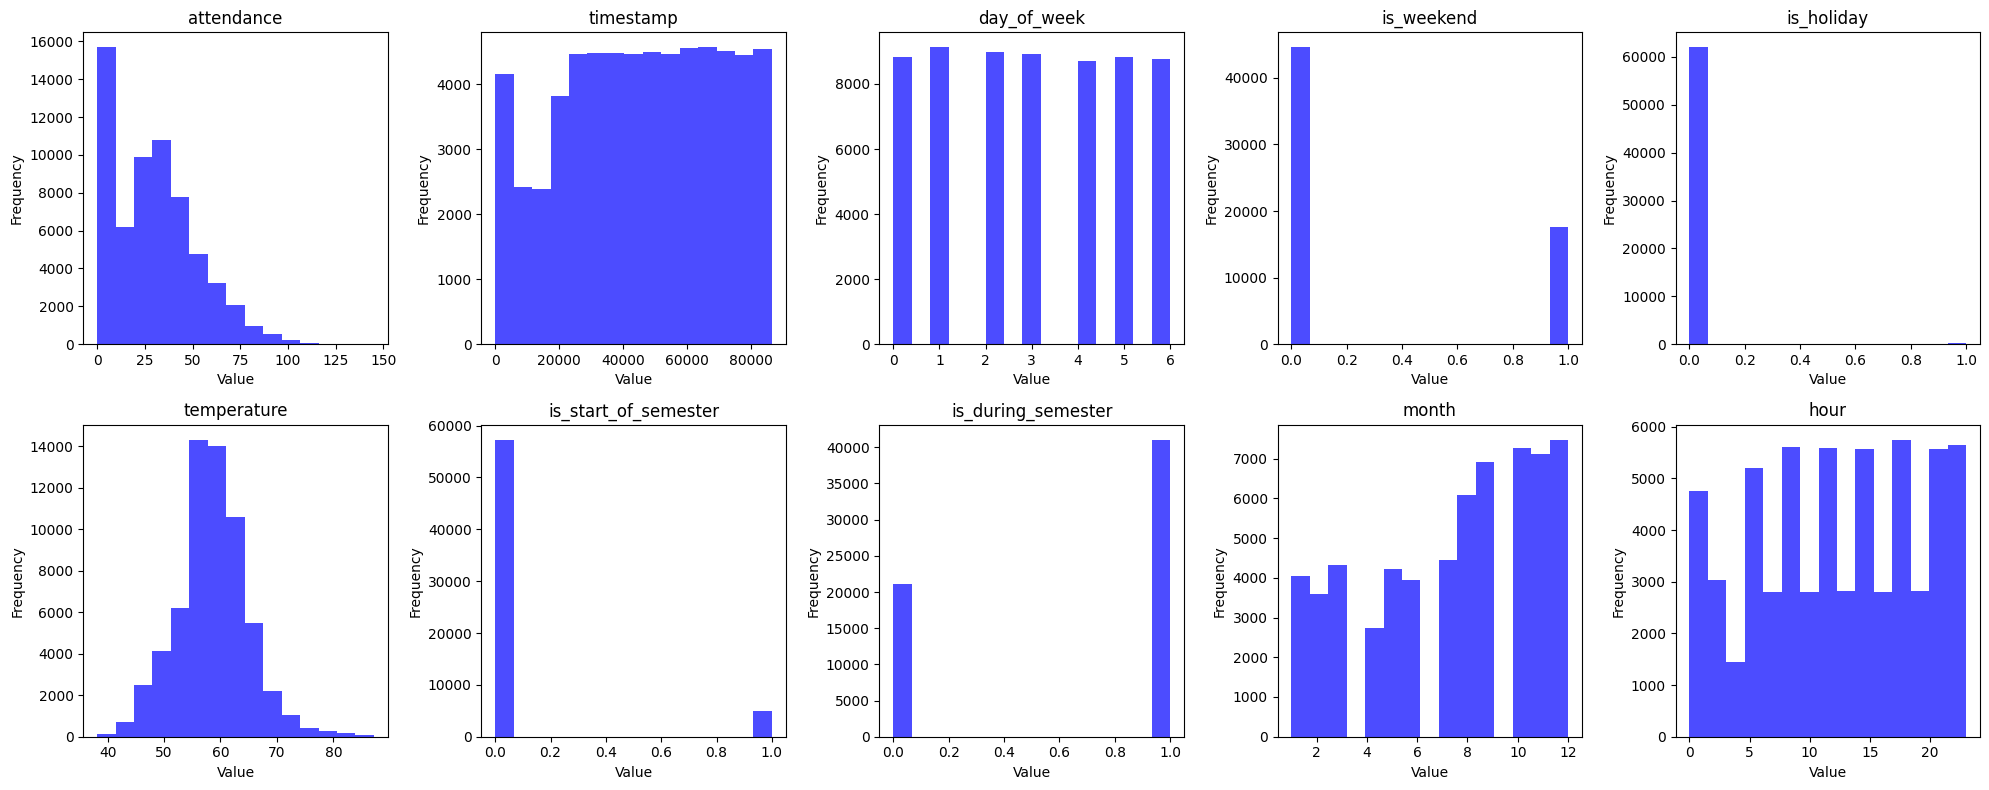

In [8]:
# Set up the grid plot
fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns
axs = axs.flatten()  # Flatten the 2D array of axes

# Create histograms for each column
for i, column in enumerate(gym.columns):
    axs[i].hist(gym[column], bins=15, color='blue', alpha=0.7)
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

**Distribution Insights:**

* `is_holiday` and `is_start_of_semester` are heavily imbalanced (mostly 0), so we’ll remove them to avoid harming model performance.
* Most `temperature` values cluster around 60°F.
* Few `attendance` values exceed 100.
* `timestamp` and `hour` suggest attendance varies by time of day.
* `day_of_week` is fairly balanced, with Tuesday (1) being the most common.
* `is_weekend` distribution reflects two weekend days vs. five weekdays.
* More data appears in the September–December period of the `month` column.

We’ll now drop `is_holiday` and `is_start_of_semester`.

In [9]:
gym = gym.drop('is_holiday', axis=1)
gym = gym.drop('is_start_of_semester', axis=1)
gym

,attendance,timestamp,day_of_week,is_weekend,temperature,is_during_semester,month,hour
0,37,61211,4,0,71.76,0,8,17
1,45,62414,4,0,71.76,0,8,17
2,40,63015,4,0,71.76,0,8,17
3,44,63616,4,0,71.76,0,8,17
4,45,64217,4,0,71.76,0,8,17
...,...,...,...,...,...,...,...,...
62179,23,67348,5,1,61.07,1,3,18
62180,21,67955,5,1,61.07,1,3,18
62181,25,68560,5,1,56.71,1,3,19
62182,18,69167,5,1,56.71,1,3,19


### **Correlations**

As we prepare for modeling, it’s important to examine relationships between features and our target (`attendance`). Features with strong correlations to the target will likely be more useful in training.

In [10]:
# Below code from dimitar.m.mikov @ Dataquest

# calculating the Pearson Correlation Coefficient values between our target variable and the other columns
correlations = gym.corr(numeric_only=True)['attendance'].sort_values(ascending=False)

# dropping the target variable, since we already know that it would correlate perfectly with itself
correlations = correlations.drop('attendance')

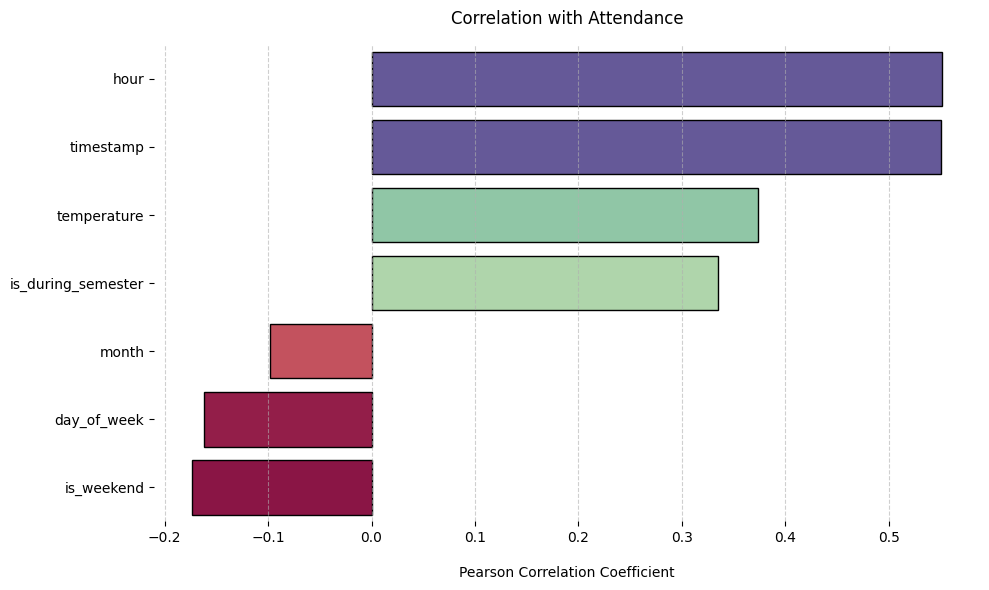

In [11]:
# Below code from dimitar.m.mikov @ Dataquest

# Visualizing our correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index,
            hue=correlations, palette='Spectral', edgecolor='black', legend=False)

plt.title('Correlation with Attendance', pad=15)
plt.xlabel('Pearson Correlation Coefficient', labelpad=15)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

From our correlation results:

* `hour` and `timestamp` have the strongest positive correlations with `attendance`
* `temperature` and `is_during_semester` follow

### **Feature Selection**

Based on our findings, we’ll use the following features in our initial model:

* `hour`
* `temperature`
* `is_during_semester`

We’re excluding `timestamp` because it overlaps significantly with `hour`. If our initial model underperforms, we may reconsider including it.

### **Building and Training Our Model**

With our features selected, we’ll define our feature set and target variable, then split the data into:

* **70% training set**
* **30% testing set**

In [12]:
# defining our data and values
data = gym.values
X = data[:, [4, 5, 7]]
y = data[:, 0]

# splitting our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
# viewing the sizes of our data portions
print(f"Training features shape: {X_train.shape}")
print(f"Training label shape: {y_train.shape}")
print('\n')
print(f"Testing features shape: {X_test.shape}")
print(f"Testing label shape: {y_test.shape}")

Training features shape: (43528, 3)
Training label shape: (43528,)


Testing features shape: (18656, 3)
Testing label shape: (18656,)


We’re now ready to train our first model.

In [14]:
# defining our model
sgdr_1 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

In [15]:
# training our model
sgdr_1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

### **Model Metrics**

We’ve trained **Model 1**. Before evaluating it, we’ll write a custom function to calculate and store multiple accuracy metrics in a dataframe, allowing for easy comparison between model versions.

In [16]:
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics_series = pd.Series({
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }, name=model_name)
    
    return metrics_series

# Create an empty DataFrame
metrics_df = pd.DataFrame()

With the function ready, we will test **Model 1** and record its metrics.

In [17]:
# applying our model to the test data
y_pred_1 = sgdr_1.predict(X_test)

In [18]:
# Calculate metrics for Model 1 and add to DataFrame
metrics_1 = calculate_metrics(y_test, y_pred_1, 'Model_1')
metrics_df = pd.concat([metrics_df, metrics_1.to_frame().T])

# Print the resulting DataFrame
print(metrics_df)

              RMSE        MAE      R2
Model_1  17.176622  13.431029  0.4276


**Model 1 Results:**

* Metrics are acceptable but leave room for improvement.
* RMSE and MAE are moderate, R² is reasonable but not high.
* Goal: increase accuracy in later versions.

### **Model 2**

For **Model 2**, we add `timestamp` to our previous feature set to see if it improves accuracy.

In [19]:
# selecting our features
X2 = data[:, [1, 4, 5, 7]]

# splitting our data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.30, random_state=42)

# defining our model_2
sgdr_2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

# training our model_2
sgdr_2.fit(X_train2, y_train2)

# applying our model_2 to the test data
y_pred_2 = sgdr_2.predict(X_test2)

# Calculate metrics for Model 2 and add to DataFrame
metrics_2 = calculate_metrics(y_test2, y_pred_2, 'Model_2')
metrics_df = pd.concat([metrics_df, metrics_2.to_frame().T])

# Print the resulting DataFrame
print(metrics_df)

              RMSE        MAE        R2
Model_1  17.176622  13.431029  0.427600
Model_2  18.624904  14.238023  0.327005


**Model 2 Results:**

* Accuracy decreased compared to Model 1.
* RMSE and MAE increased; R² dropped.
* Conclusion: `timestamp` is not beneficial and will be excluded from future models.

### **Model 3**

In **Model 3**, we include all features except `timestamp`.

In [20]:
# selecting our features
X3 = data[:, 2:]

# splitting our data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.30, random_state=42)

# defining our model_3
sgdr_3 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

# training our model_3
sgdr_3.fit(X_train3, y_train3)

# applying our model_3 to the test data
y_pred_3 = sgdr_3.predict(X_test3)

# Calculate metrics for Model 3 and add to DataFrame
metrics_3 = calculate_metrics(y_test3, y_pred_3, 'Model_3')
metrics_df = pd.concat([metrics_df, metrics_3.to_frame().T])

# Print the resulting DataFrame
print(metrics_df)

              RMSE        MAE        R2
Model_1  17.176622  13.431029  0.427600
Model_2  18.624904  14.238023  0.327005
Model_3  16.163705  12.409228  0.493119


**Model 3 Results:**

* Accuracy improved over Models 1 and 2.
* Lower RMSE and MAE, higher R².
* These features will be kept for future models.

### **Model 4**

For **Model 4**, we normalize the features so they’re on the same scale, reducing the impact of differing magnitudes.

In [21]:
# selecting our features
X4 = data[:, 2:]

# splitting our data
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.30, random_state=42)

# normalizing our features
scaler = StandardScaler()
scaler.fit(X_train4)
X_train4_scaled = scaler.transform(X_train4)
X_test4_scaled = scaler.transform(X_test4)

# defining our model_4
sgdr_4 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

# training our model_4
sgdr_4.fit(X_train4_scaled, y_train4)

# applying our model_4 to the test data
y_pred_4 = sgdr_4.predict(X_test4_scaled)

# Calculate metrics for Model 4 and add to DataFrame
metrics_4 = calculate_metrics(y_test4, y_pred_4, 'Model_4')
metrics_df = pd.concat([metrics_df, metrics_4.to_frame().T])

# Print the resulting DataFrame
print(metrics_df)

              RMSE        MAE        R2
Model_1  17.176622  13.431029  0.427600
Model_2  18.624904  14.238023  0.327005
Model_3  16.163705  12.409228  0.493119
Model_4  16.066029  12.110959  0.499227


**Model 4 Results:**

* Slight accuracy improvement over Model 3.
* Normalization will be retained in the next version.

### **Model 5**

In **Model 5**, we tweak model parameters. If it outperforms Model 4, it will become our final model.

In [22]:
# selecting our features
X5 = data[:, 2:]

# splitting our data
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.30, random_state=42)

# normalizing our features
scaler = StandardScaler()
scaler.fit(X_train4)
X_train5_scaled = scaler.transform(X_train5)
X_test5_scaled = scaler.transform(X_test5)

# defining our model_5; note the different parameters; code from dimitar.m.mikov @ Dataquest
sgdr_5 = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)

# training our model_5
sgdr_5.fit(X_train5_scaled, y_train5)

# applying our model_5 to the test data
y_pred_5 = sgdr_5.predict(X_test5_scaled)

# Calculate metrics for Model 5 and add to DataFrame
metrics_5 = calculate_metrics(y_test5, y_pred_5, 'Model_5')
metrics_df = pd.concat([metrics_df, metrics_5.to_frame().T])

# Print the resulting DataFrame
print(metrics_df)

              RMSE        MAE        R2
Model_1  17.176622  13.431029  0.427600
Model_2  18.624904  14.238023  0.327005
Model_3  16.163705  12.409228  0.493119
Model_4  16.066029  12.110959  0.499227
Model_5  15.941039  12.174278  0.506988


**Model 5 Results:**

* Accuracy improved again, reaching **50.7%**.
* While further tuning could yield more gains, we’ll stop here for the sake of the project scope.

### **Visualizing Results**

We will now visualize our final model’s predictions against actual values.

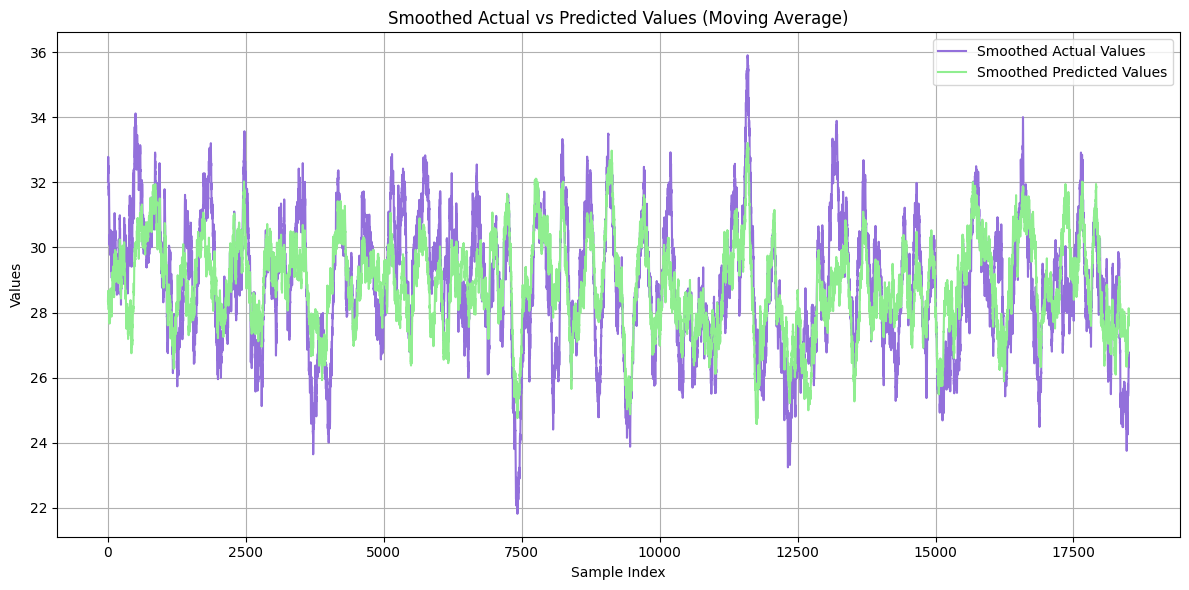

In [23]:
# define the actual values and the predicted values
actual_values = np.array(y_test5)
predicted_values = np.array(y_pred_5)

# Function to calculate moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Smoothing parameters
window_size = 150  # Size of the moving average window

# Apply moving average for smoothing
smoothed_actual = moving_average(actual_values, window_size)
smoothed_predicted = moving_average(predicted_values, window_size)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(smoothed_actual, label='Smoothed Actual Values', linestyle='-', color='#9370DB')
plt.plot(smoothed_predicted, label='Smoothed Predicted Values', linestyle='-', color='#90EE90')
plt.title('Smoothed Actual vs Predicted Values (Moving Average)')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

The visualization confirms our metrics: predictions generally follow the actual trend with occasional deviations. While not perfect, the model serves as a useful starting point for developing a more sophisticated model, as it highlights the need for further refinement and additional variables to improve reliability.

### **Conclusion**

In this project, we demonstrated how a **stochastic gradient descent linear regression model** can be applied to predict gym attendance.

With a final accuracy of **50.7%**, the model is far from perfect but serves as a solid starting point for more advanced modeling techniques. Predictions are based on a single campus gym’s historical data, so accuracy could be improved with a larger, more varied dataset.

We recommend not relying solely on this model for precise forecasting. However, with additional data, time, and resources, it could evolve into a much more accurate and reliable tool.